# Quality Prediction of Red Wine and White Wine Based on Physicochemical Tests


## 1. Introduction


   Wine is an alcoholic beverage made from grapes. White wine and red wine are two variants of wine that is widely known. Red wine is made from dark-colored grape varieties, while white wine is made from non-colored grape pulp (source: Wikipedia https://en.wikipedia.org/wiki/Wine). Physicochemical properties, such as pH and acidity,  influence the tasting and quality of wine. We will focus on predicting the quality of white wine and red wine based on results of physicochemical tests.
Two separated datasets will be used in this research, which are related to red and white variants of the Portuguese "Vinho Verde" wine. One contains 11 physicochemical parameters (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,  sulphates, alcohol) and the quality index (0-10), the other contains the data of red wine.


## 2. Methods and results

 - describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

 %% loads data from the original source on the web 


In [69]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("e1071")
install.packages("GGally")
library(e1071)
library(GGally)
install.packages("gridExtra")
library(gridExtra)
install.packages("ROSE")
library(ROSE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loaded ROSE 0.0-3



In [7]:
# Import Red wine data
red_data <- read.csv("winequality-red.csv", sep = ";") 
head(red_data)

# Import white wine data
white_data <- read.csv("winequality-white.csv", sep = ";")
head(white_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


%% wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned classification or clustering analysis

In [8]:
# Scale the data
red_scaled <- red_data %>% 
  select(-quality) %>% 
  scale(center = FALSE) 

red_scaled <- data.frame(quality = red_data$quality, red_scaled)
head(red_scaled)

white_scaled <- white_data %>% 
  select(-quality) %>% 
  scale(center = FALSE) 

white_scaled <- data.frame(quality = white_data$quality, white_scaled)
head(white_scaled)

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
5,0.8703407,1.255555,0.0000000,0.6541052,0.7649761,0.5784783,0.5970695,1.0007419,1.0585855,0.8237400,0.8968984
5,0.9173862,1.578412,0.0000000,0.8950914,0.9864165,1.3147233,1.1765782,0.9997389,0.9650922,1.0002557,0.9350642
5,0.9173862,1.363174,0.1198329,0.7918116,0.9260236,0.7888340,0.9482869,0.9999395,0.9831877,0.9561268,0.9350642
6,1.3172725,0.502222,1.6776605,0.6541052,0.7549106,0.8940119,1.0536521,1.0009425,0.9530286,0.8531593,0.9350642
5,0.8703407,1.255555,0.0000000,0.6541052,0.7649761,0.5784783,0.5970695,1.0007419,1.0585855,0.8237400,0.8968984
5,0.8703407,1.183809,0.0000000,0.6196787,0.7549106,0.6836561,0.7024347,1.0007419,1.0585855,0.8237400,0.8968984


quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
6,1.0134309,0.9122795,1.0127692,2.5367895,0.8871633,1.1481392,1.1744078,1.0069072,0.9398009,0.8946063,0.8311998
6,0.9120878,1.0136438,0.9565042,0.1960804,0.9660223,0.3571989,0.9118931,0.9998658,1.0337810,0.9741268,0.8973179
6,1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906
6,1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
6,1.0423861,0.7771269,0.9002393,1.0416769,1.1434550,1.1991676,1.2849402,1.0014753,0.9993216,0.7952056,0.9350997
6,1.1726843,0.9460676,1.1252991,0.8455965,0.9857370,0.7654261,0.6701032,1.0009723,1.0212503,0.8747261,0.9539906


%% performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification, regression or clustering analysis 

In [9]:
# See the distribution of quality level
red_data %>% 
    group_by(quality) %>%
    summarize(n = n()) 
nrow(red_data)

white_data %>%
    group_by(quality) %>%
    summarize(n=n()) 
nrow(white_data)


quality,n
3,10
4,53
5,681
6,638
7,199
8,18


[1] 1599

quality,n
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


[1] 4898

From the table above we can see that every observation has a quality level (i.e. no observation with quality unknown).

%%  creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification or clustering analysis

%% red wine data

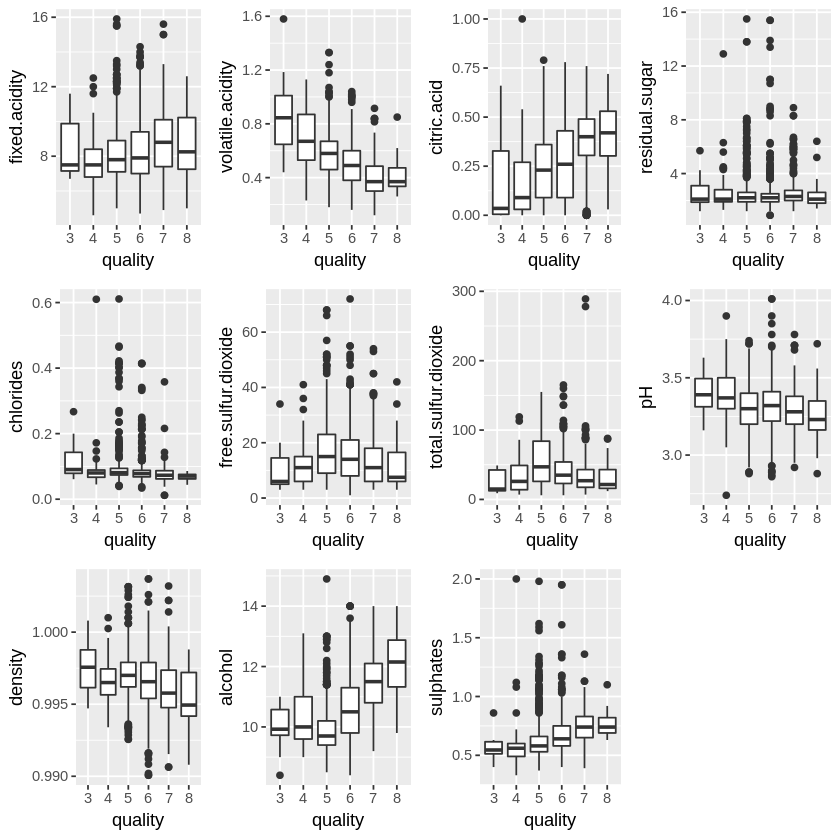

In [10]:
red_data_quality_factor <- red_data %>%
    mutate(quality = as.factor(quality))

plot_fa <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- red_data_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- red_data_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- red_data_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()


grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4)

%% white wine

%% good predictors to use for red wine 
- volatile acidity 
- citric acid 
- alcohol

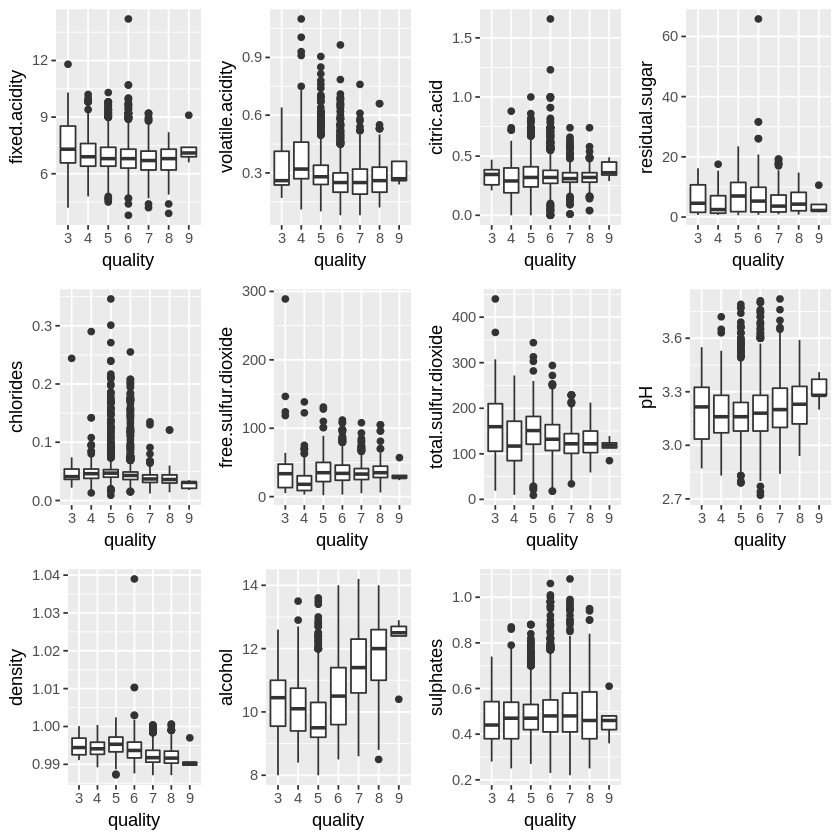

In [11]:
white_data_quality_factor <- white_data %>%
    mutate(quality = as.factor(quality))

plot_fa <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- white_data_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- white_data_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- white_data_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()

grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4)

%% Good predictors to use for white wine 
- residual sugar 
- density 
- alcohol 

%% performs either a classification, regression or clustering analysis

### 2.1  Knn Regression 

 - Red Wine

%% using every single predictor on the scaled data set for a regression model

In [43]:
set.seed(100)

training_set <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- red_scaled %>% 
    select(-quality) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- red_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- red_scaled %>% 
    select(-quality) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- red_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

%% cross validation to choose best value of k

In [44]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_red = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_red <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_red, trControl = train_control)

knn_red

k-Nearest Neighbors 

1281 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1153, 1152, 1152, 1154, 1154, 1153, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.7975416  0.2501362  0.4684284
    2  0.7466745  0.2470331  0.5231170
    3  0.7283019  0.2420591  0.5448059
    4  0.7164770  0.2451099  0.5482398
    5  0.7115841  0.2427249  0.5479540
    6  0.7035250  0.2517749  0.5455386
    7  0.6963584  0.2612551  0.5389980
    8  0.6949164  0.2616176  0.5424115
    9  0.6925330  0.2640492  0.5458515
   10  0.6900828  0.2665583  0.5445147
   11  0.6879881  0.2703780  0.5437551
   12  0.6839562  0.2781686  0.5429961
   13  0.6830984  0.2788136  0.5425267
   14  0.6807511  0.2829661  0.5418957
   15  0.6805427  0.2828378  0.5413993
   16  0.6816772  0.2806594  0.5425618
   17  0.6831690  0.2775737  0.5443973
   18  0.6812243  0.2821486  0.5435638
   19  0.6832611  0.2782056  0.5447006


%% best k is k = 20, forming the final model with k = 13

In [45]:
set.seed(100)
k_best_red <- data.frame(k = 15)
knn_red <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best_red)
knn_red

k-Nearest Neighbors 

1281 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1281, 1281, 1281, 1281, 1281, 1281, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7097263  0.2335073  0.5591935

Tuning parameter 'k' was held constant at a value of 15

%% Testing the model on the test data

In [46]:
set.seed(100)
test <- predict(knn_red, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

,obs,pred
quality1,5,5.466667
quality2,5,5.400000
quality3,5,5.470588
quality4,5,5.133333
quality5,5,5.800000
quality6,4,5.200000
quality7,5,5.562500
quality8,6,5.466667
quality9,5,5.266667
quality10,6,5.200000


RMSE  Rsquared       MAE 
0.6895984 0.3226301 0.5506844

The RMSE is 0.689598362218414 for using all predictors on the scaled data

Using the predictors that look good on the red wine data: 
- volatile acidity 
- citric acid 
- alcohol

In [48]:
set.seed(100)

training_set <- red_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- red_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- red_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- red_scaled %>% 
    select(volatile.acidity, citric.acid, alcohol) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- red_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

Choosing cross validation to choose the best value of k 

In [49]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_red_n = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_red_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_red, trControl = train_control)

knn_red_n

k-Nearest Neighbors 

1281 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1153, 1152, 1152, 1154, 1154, 1153, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.8303233  0.2158594  0.4993744
    2  0.7567825  0.2297416  0.5509205
    3  0.7244730  0.2540604  0.5445054
    4  0.7091074  0.2615369  0.5432350
    5  0.7000280  0.2674456  0.5413718
    6  0.6959591  0.2679169  0.5421212
    7  0.6907164  0.2727634  0.5404114
    8  0.6900435  0.2712129  0.5393109
    9  0.6897938  0.2694502  0.5405403
   10  0.6887275  0.2704598  0.5421620
   11  0.6857679  0.2753332  0.5408146
   12  0.6833090  0.2787866  0.5406661
   13  0.6817122  0.2809549  0.5390328
   14  0.6823879  0.2797218  0.5406092
   15  0.6843495  0.2754244  0.5414372
   16  0.6839085  0.2760713  0.5419507
   17  0.6848699  0.2734467  0.5423863
   18  0.6845752  0.2736430  0.5425031
   19  0.6843295  0.2743015  0.5438914


Forming the best model with k = 13

In [50]:
set.seed(100)

k_best <- data.frame(k = 26)
knn_red_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_red_n

k-Nearest Neighbors 

1281 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1281, 1281, 1281, 1281, 1281, 1281, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6945227  0.2563285  0.5533583

Tuning parameter 'k' was held constant at a value of 26

Testing the model on the test data

In [51]:
set.seed(100)

test <- predict(knn_red_n, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

,obs,pred
quality1,5,4.961538
quality2,5,5.153846
quality3,5,5.115385
quality4,5,5.230769
quality5,5,5.333333
quality6,4,5.307692
quality7,5,5.423077
quality8,6,5.461538
quality9,5,5.269231
quality10,6,5.461538


RMSE  Rsquared       MAE 
0.6572500 0.3954265 0.5359031

RMSE of 0.657 using the selected predictors vs. the RMSE of 0.689598 using all predictors. Using the selected predictors makes it SLIGHTLY better in predicting the quality of red wine. 

 - White Wine

%% Using every predictors for the scaled white wine data

In [52]:
set.seed(100)

training_set <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- white_scaled %>% 
    select(-quality) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- white_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- white_scaled %>% 
    select(-quality) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

Choosing cross validation to choose the best value of k 

In [53]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_white = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_white <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white, trControl = train_control)

knn_white

k-Nearest Neighbors 

3919 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3527, 3527, 3526, 3527, 3526, 3529, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.8245596  0.3200122  0.4728051
    2  0.7843719  0.3085805  0.5374274
    3  0.7591199  0.3130239  0.5511620
    4  0.7471215  0.3168095  0.5574062
    5  0.7420983  0.3161124  0.5588848
    6  0.7358852  0.3209154  0.5582212
    7  0.7339887  0.3214014  0.5585451
    8  0.7314869  0.3232781  0.5571125
    9  0.7315740  0.3217282  0.5610772
   10  0.7301549  0.3228409  0.5622646
   11  0.7279918  0.3260225  0.5621811
   12  0.7271507  0.3274581  0.5636264
   13  0.7281811  0.3254989  0.5657620
   14  0.7289175  0.3242917  0.5674366
   15  0.7297375  0.3230431  0.5690988
   16  0.7293823  0.3236869  0.5691030
   17  0.7299006  0.3230011  0.5699549
   18  0.7318802  0.3194982  0.5731515
   19  0.7317515  0.3202322  0.5731765


Forming the model with k = 12

In [55]:
set.seed(100)

k_best <- data.frame(k = 12)
knn_white <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white

k-Nearest Neighbors 

3919 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3919, 3919, 3919, 3919, 3919, 3919, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7533703  0.2851869  0.5795348

Tuning parameter 'k' was held constant at a value of 12

In [56]:
set.seed(100)

test <- predict(knn_white, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

,obs,pred
quality1,6,5.615385
quality2,6,5.833333
quality3,6,5.583333
quality4,5,6.083333
quality5,8,5.500000
quality6,6,5.666667
quality7,8,6.250000
quality8,6,5.500000
quality9,6,6.333333
quality10,7,6.083333


RMSE  Rsquared       MAE 
0.7487494 0.2945733 0.5777994

Using the predictors that look good: 
- residual sugar 
- density 
- alcohol

In [58]:
set.seed(100)

training_set <- white_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- white_scaled %>% 
    select(residual.sugar, density, alcohol) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- white_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- white_scaled %>% 
    select(residual.sugar, density, alcohol) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- white_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

Using cross validation to determine the best value of k 

In [61]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_white_n = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_white_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_white_n, trControl = train_control)

knn_white_n

k-Nearest Neighbors 

3919 samples
   3 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3527, 3527, 3526, 3527, 3526, 3529, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.9164080  0.2134555  0.5459037
    2  0.8442017  0.2188912  0.5860170
    3  0.8259954  0.2146228  0.6090314
    4  0.8127714  0.2164298  0.6142320
    5  0.8014801  0.2210934  0.6108744
    6  0.7928281  0.2255593  0.6087146
    7  0.7889748  0.2259824  0.6108543
    8  0.7871658  0.2249270  0.6135331
    9  0.7869197  0.2225627  0.6153668
   10  0.7851134  0.2233352  0.6147515
   11  0.7845023  0.2230229  0.6166133
   12  0.7838832  0.2231596  0.6175671
   13  0.7836037  0.2230813  0.6189406
   14  0.7816480  0.2256204  0.6177626
   15  0.7824643  0.2237442  0.6189343
   16  0.7839416  0.2209631  0.6190444
   17  0.7839622  0.2203566  0.6188330
   18  0.7837199  0.2205043  0.6192498
   19  0.7834738  0.2203222  0.6196186


Forming the final model with k = 44

In [62]:
set.seed(100)

k_best <- data.frame(k = 44)
knn_white_n <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_white_n

k-Nearest Neighbors 

3919 samples
   3 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3919, 3919, 3919, 3919, 3919, 3919, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7840064  0.2164321  0.6216951

Tuning parameter 'k' was held constant at a value of 44

In [63]:
set.seed(100)

test <- predict(knn_white_n, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

,obs,pred
quality1,6,5.425532
quality2,6,5.644444
quality3,6,6.295455
quality4,5,5.955556
quality5,8,6.409091
quality6,6,5.886364
quality7,8,5.822222
quality8,6,5.545455
quality9,6,5.340909
quality10,7,5.409091


RMSE  Rsquared       MAE 
0.7700011 0.2509638 0.6155297

The RMSE for using all the predictors for the scaled white wine data is 0.748749, while the RMSE for the selected predictors for the scaled white wine data is 0.77. The model performs WORSE using the predictors that look good. 

In [82]:
#balanced_data <- ovun.sample(quality ~ ., data = red_scaled, method = "over", p = 0.6)$red_scaled
#head(balanced_data)

In [77]:
wine <- rbind(white_scaled, red_scaled)

wine_scaled <- wine %>% 
  select(-quality) %>% 
  scale(center = FALSE) 

wine_scaled <- data.frame(quality = wine$quality, wine_scaled)
head(wine_scaled)

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
6,1.013509,0.9123497,1.0128471,2.5369848,0.8872316,1.1482276,1.1744982,1.0069847,0.9398732,0.8946751,0.8312637
6,0.912158,1.0137219,0.9565778,0.1960954,0.9660967,0.3572264,0.9119633,0.9999428,1.0338605,0.9742018,0.8973870
6,1.172775,0.9461404,1.1253857,0.8456616,0.9858129,0.7654851,0.6701548,1.0010494,1.0213289,0.8747935,0.9540641
6,1.042466,0.7771868,0.9003086,1.0417571,1.1435430,1.1992599,1.2850392,1.0015524,0.9993985,0.7952668,0.9351717
6,1.042466,0.7771868,0.9003086,1.0417571,1.1435430,1.1992599,1.2850392,1.0015524,0.9993985,0.7952668,0.9351717
6,1.172775,0.9461404,1.1253857,0.8456616,0.9858129,0.7654851,0.6701548,1.0010494,1.0213289,0.8747935,0.9540641


In [78]:
wine %>% group_by(quality) %>%
    summarize(n = n()) 

nrow(wine)

quality,n
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


[1] 6497

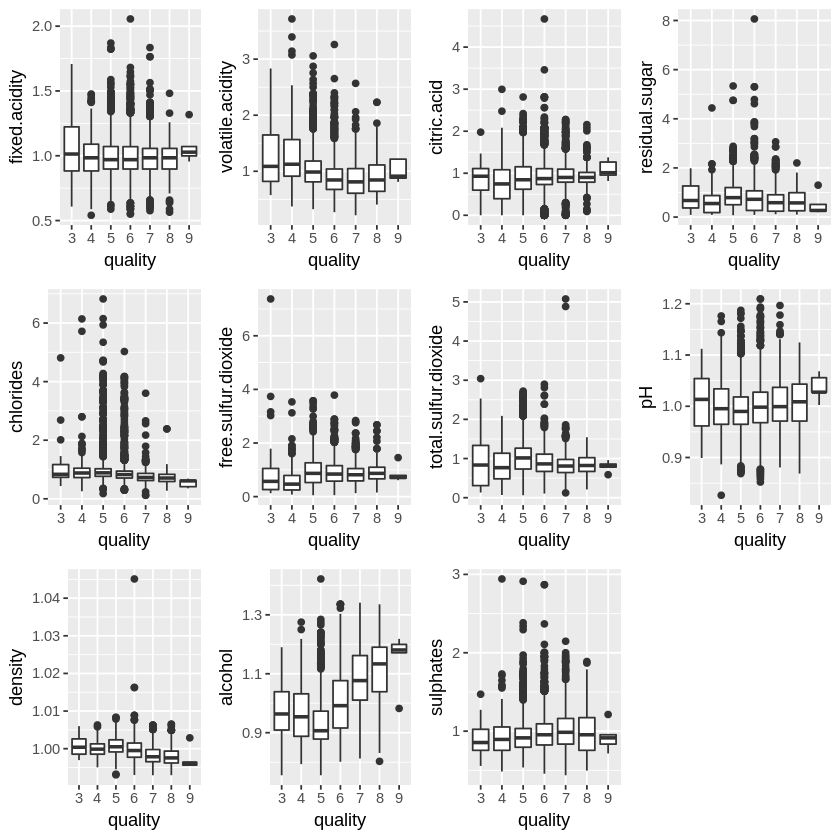

In [79]:
wine_quality_factor <- wine %>%
    mutate(quality = as.factor(quality))

plot_fa <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = fixed.acidity)) + 
    geom_boxplot()

plot_va <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = volatile.acidity)) +
    geom_boxplot()

plot_ca <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = citric.acid)) +
    geom_boxplot()

plot_rs <- wine_quality_factor %>%  
    ggplot(aes(x = quality, y = residual.sugar)) +
    geom_boxplot()

plot_cl <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = chlorides)) +
    geom_boxplot()

plot_fsd <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = free.sulfur.dioxide)) +
    geom_boxplot()

plot_tsd <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = total.sulfur.dioxide)) +
    geom_boxplot()

plot_ph <- wine_quality_factor %>%  
    ggplot(aes(x = quality, y = pH)) +
    geom_boxplot()

plot_den <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = density)) +
    geom_boxplot()

plot_alc <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = alcohol)) +
    geom_boxplot()

plot_sulp <- wine_quality_factor %>% 
    ggplot(aes(x = quality, y = sulphates)) +
    geom_boxplot()


grid.arrange(plot_fa, plot_va, plot_ca, plot_rs, plot_cl, plot_fsd, plot_tsd, plot_ph, plot_den, plot_alc, plot_sulp, ncol = 4)

In [80]:
set.seed(100)

training_set <- wine_scaled %>% 
    select(quality) %>% 
    unlist() %>% 
    createDataPartition(p = 0.80, list = FALSE)

X_train <- wine_scaled %>% 
    select(-quality) %>% 
    slice(training_set) %>% 
    data.frame()

Y_train <- wine_scaled %>% 
    select(quality) %>% 
    slice(training_set) %>% 
    unlist()

X_test <- wine_scaled %>% 
    select(-quality) %>% 
    slice(-training_set) %>% 
    data.frame()

Y_test <- wine_scaled %>% 
    select(quality) %>% 
    slice(-training_set) %>% 
    unlist()

In [81]:
set.seed(100)

train_control <- trainControl(method = "cv", number = 10)

k_wine = data.frame(k = seq(from = 1, to = 100, by = 1))

knn_wine <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_wine, trControl = train_control)

knn_wine

k-Nearest Neighbors 

5199 samples
  11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4679, 4679, 4680, 4679, 4679, 4680, ... 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.8171025  0.3118837  0.4797143
    2  0.7696201  0.3040434  0.5352664
    3  0.7557993  0.2992710  0.5475742
    4  0.7456174  0.3012091  0.5528122
    5  0.7372792  0.3057874  0.5559126
    6  0.7316567  0.3082911  0.5575756
    7  0.7311063  0.3060243  0.5606138
    8  0.7285399  0.3083163  0.5610320
    9  0.7259098  0.3111975  0.5593424
   10  0.7262560  0.3097519  0.5609385
   11  0.7248373  0.3113960  0.5618890
   12  0.7260506  0.3086235  0.5639612
   13  0.7276222  0.3054416  0.5661678
   14  0.7280074  0.3047053  0.5677305
   15  0.7260200  0.3083327  0.5678542
   16  0.7255055  0.3093734  0.5682200
   17  0.7249908  0.3104328  0.5680114
   18  0.7259554  0.3087168  0.5686474
   19  0.7267922  0.3072817  0.5698147


In [83]:
set.seed(100)

k_best <- data.frame(k = 11)
knn_wine <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_best)
knn_wine

k-Nearest Neighbors 

5199 samples
  11 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 5199, 5199, 5199, 5199, 5199, 5199, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.7558807  0.2650248  0.5824466

Tuning parameter 'k' was held constant at a value of 11

In [84]:
set.seed(100)

test <- predict(knn_wine, X_test)

predictions <- data.frame(obs = Y_test, pred = test)

head(predictions, n = 10)
test_error <- defaultSummary(predictions)
test_error

,obs,pred
quality1,6,5.454545
quality2,6,5.545455
quality3,5,5.583333
quality4,6,5.909091
quality5,6,5.666667
quality6,6,6.272727
quality7,5,5.333333
quality8,6,5.666667
quality9,6,5.666667
quality10,6,6.272727


RMSE  Rsquared       MAE 
0.7401994 0.2950625 0.5698609

Combining the two wine data sets together and performing knn regression is WORSE than doing them separately, showing that there is a difference in the predictors between red and white wine. 

### 2.2. Linear Regression

 - Red Wine

 - White Wine

 %% creates a visualization of the classification, regression  or clustering analysis 

## 3. Discussion

%% summarize what you found 
%% discuss whether this is what you expected to find?
%% discuss what impact could such findings have?
%% discuss what future questions could this lead to?

## 4. Reference